In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
import numpy as np
import zeus

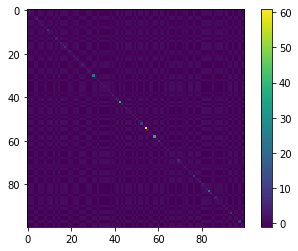

In [19]:
ndim = 100
nwalkers = 2*ndim
nsteps= 10000

a = 5.0
A = np.array([np.random.randn(ndim) + np.random.randn(1)*a for i in range(ndim)])
A = np.dot(A,np.transpose(A))
D_half = np.diag(np.diag(A)**(-0.5))
C = np.dot(np.dot(D_half,A),D_half)

for i in range(ndim):
    C[i,i] = 1.0/np.random.rand()

icov = np.linalg.inv(C)
plt.imshow(C)
plt.colorbar()

mu = np.random.rand(ndim) * 100.0

def logp(x):
    return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))

p0 = np.random.rand(nwalkers,ndim)
start = p0 + 1e-4*np.random.randn(nwalkers, ndim)

In [20]:
sampler = zeus.sampler(logp, nwalkers, ndim)
samples = sampler.run(start, nsteps)

100%|██████████| 10000/10000 [02:38<00:00, 63.06it/s]


In [ ]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(np.shape(samples)[1]),samples[:,:,n].T,alpha=0.5)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

chain = samples[:,int(nsteps/2):,:].reshape(-1,ndim)
plt.scatter(chain[:,0],chain[:,1], alpha=0.2)
plt.show()
print('mean:', np.mean(chain, axis=0))
print('std:', np.std(chain, axis=0))

act_mean_minas = 0.0
for i in range(ndim):
    act_mean_minas += zeus.autocorrtime(chain[:,i]) 
act_mean_minas /= ndim
print('act:', act_mean_minas)
print('ESS:', nwalkers * nsteps / act_mean_minas)
print('ESS/LE:', (nwalkers * nsteps / act_mean_minas)/sampler.nlogp)